In [2]:
a = [1, 2, 3, 4, 5]
b = [10, 11, 12, 13, 14]

a + b

[1, 2, 3, 4, 5, 10, 11, 12, 13, 14]

In [3]:
result = []
for first, second in zip(a, b):
    result.append(first + second)

result

[11, 13, 15, 17, 19]

cumbersome over a big array

In [8]:
import numpy as np

# creaet an array 
a = np.array([1, 2, 3, 4])
print(type(a))
print(a.dtype)

<class 'numpy.ndarray'>
int32


In [9]:
f = np.array([1.2, 2.3, 4.5, 5.6])
f.dtype

dtype('float64')

In [10]:
a[0]

1

In [12]:
a[0] = 10
a

array([10,  2,  3,  4])

In [13]:
a[0] = 11.5
a

array([11,  2,  3,  4])

In [14]:
a.ndim

1

In [15]:
a.shape

(4,)

In [16]:
a + f

array([12.2,  4.3,  7.5,  9.6])

In [17]:
a * f


array([13.2,  4.6, 13.5, 22.4])

In [20]:
# raise the array
# vectorized operaation

f ** a

array([  7.43008371,   5.29      ,  91.125     , 983.4496    ])

In [21]:
f * 10

array([12., 23., 45., 56.])

universal functions(ufuncs)

In [23]:
#sin value of every element of a
np.sin(a)

array([-0.99999021,  0.90929743,  0.14112001, -0.7568025 ])

multidimensional; arrays

In [24]:
c = np.array([[0, 1, 2, 3], [10, 11, 12, 13]])
c

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13]])

In [25]:
c.shape

(2, 4)

In [26]:
c.size

8

In [28]:
c.ndim

2

In [30]:
c[1, 3]

13

In [31]:
c[1]

array([10, 11, 12, 13])

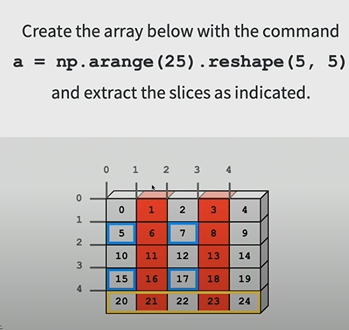

In [32]:
a = np.arange(25).reshape(5, 5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

*red selection*

In [34]:
a[:, ::2]

array([[ 0,  2,  4],
       [ 5,  7,  9],
       [10, 12, 14],
       [15, 17, 19],
       [20, 22, 24]])

In [36]:
red = a[:, 1::2]
red

array([[ 1,  3],
       [ 6,  8],
       [11, 13],
       [16, 18],
       [21, 23]])

*yellow selection*

In [37]:
a[4, :]

array([20, 21, 22, 23, 24])

In [38]:
yellow = a[4, :]
yellow

array([20, 21, 22, 23, 24])

In [39]:
a[4]

array([20, 21, 22, 23, 24])

In [40]:
a[-1]

array([20, 21, 22, 23, 24])

In [41]:
a[-1, :]

array([20, 21, 22, 23, 24])

*blue selection*

In [42]:
a[1::2]

array([[ 5,  6,  7,  8,  9],
       [15, 16, 17, 18, 19]])

In [44]:
a[1::2, :3:2]

array([[ 5,  7],
       [15, 17]])

In [45]:
a[1::2, :4:2]


array([[ 5,  7],
       [15, 17]])

In [46]:
a[1::2, :-1:2]

array([[ 5,  7],
       [15, 17]])

In [47]:
blue = a[1::2, :3:2]; blue

array([[ 5,  7],
       [15, 17]])